In [1]:
import pandas
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.preprocessing import Imputer

# Analyse statistique des candidats à la présidentielle 2017

L'idée est de voir si on peut utiliser des outils d'analyse statistiques pour classer les candidats à la présidentielle française 2017, en fonction uniquement de leur programme mais sans aucune information supplémentaire.

## Méthodologie

On utilise le site http://www.lemonde.fr/programmes/ pour catégoriser chaque candidat selon chacun des points du programme tel que répertorié sur le site.

L'idée est de voir si on peut fournir une carto 2d des candidats sans aucune autre information que les points du programme. Pour cela on utilise une technique appelée analyse en composantes principales (ACP). Pour simplifier cela répond à la question: _comment faire pour expliquer le maximum des variations entre les programmes en utilisant uniquement 2 axes?_

## Limites

 - la classification retenue sur le site du monde met de côté certaines questions qui ont pris beaucoup de place dans les débats (e.g la 6ème république de Mélenchon, ou l'affaire des emplois fictifs Fillon)
 - d'autre part il m'a semblé relever quelques erreurs sur le site du Monde. Je ne les ai pas corrigées, j'ai essayé d'être le plus fidèle possible
 - malgré toute ma bonne volonté j'ai probablement un biais par ma propre opinion politique. Celui ci se retrouve dans le travail de retranscription des éléments du programme (du texte) en un nombre entre `-1` et `1`.
 - les candidats qui ne prennent pas position sur un sujet recoivent par défaut une position "moyenne". Cela ne reflète pas forcément la réalité, et notamment lorsqu'un candidat n'a pas pris position sur beaucoup des sujets répertoriés par le Monde. Par exemple Arthaud n'a pas beaucoup de prises de position d'après le site. Ceci pousse artificiellement le candidat vers le centre.
 - l'analyse en composante principale à ses limites, qui sont techniques et donc que je n'expliciterai pas ici.

## Données

Les données proviennent de http://www.lemonde.fr/programmes/ . Je les ai retranscrites entre une position entre `-1` et `1` pour chaque point du programme. Le signe de cette valeur n'a absolumment aucune importance pour l'outil ACP, c'est seulement un moyen de regrouper les positions entre elles: si deux candidats ont `-1` pour un point du programme alors on considère qu'ils ont des positions similaires. A l'inverse si un candidat à `-1` et un autre `1` cela veut dire qu'ils ont des positions opposées.

Pour certains points j'ai jugé qu'il était difficile de raprocher les positions et donc j'ai mis `0` à tout le monde. Pour certain point j'ai séparé entre plusieurs lignes.

Lorsqu'un candidat est noté comme n'ayant pas pris position, je n'ai rien noté. Ce sont les notes `NaN` ci dessous, qui sont ensuite remplacées par la valeur moyenne entre tous les candidats.

Dans la case suivante vous pouvez voir les données brutes:

In [2]:
csv = pandas.read_csv('pp1.csv')
print(csv)
imp = Imputer(missing_values='NaN', strategy='mean', axis=1)
imp.fit(csv)
X_raw = imp.transform(csv.values[:,1:]).T

                              Theme  Macron  Le Pen  Fillon  Melenchon  Hamon  \
0                    Fonctionnaires    -1.0     NaN    -1.0        1.0    1.0   
1                         Retraites     0.0     0.5     0.5        0.5    0.5   
2                           Chomage     0.0     NaN    -1.0        1.0    1.0   
3                      Age retraite     0.0     1.0    -1.0        1.0    0.0   
4                    Minima sociaux    -1.0     NaN    -1.0        1.0    0.0   
5                               RSI    -1.0     1.0     1.0        1.0    1.0   
6                    Augmenter SMIC    -1.0    -1.0    -1.0        1.0    1.0   
7                 Taxe d’habitation    -1.0     0.0     NaN        1.0    NaN   
8              Fiscalité succession     0.0    -1.0    -1.0        1.0   -0.5   
9                               TVA     0.0     0.0     1.0       -0.5   -0.5   
10                   Fraude fiscale     0.0     0.0     NaN        1.0    1.0   
11                   Impot s

ici on applique l'analyse en composantes principales (PCA=principal component analysis en anglais):

In [3]:
pca = PCA(n_components=2)
pca.fit(X_raw)
X_proj = pca.transform(X_raw)

Puis on affiche les résultats sur un graphique:

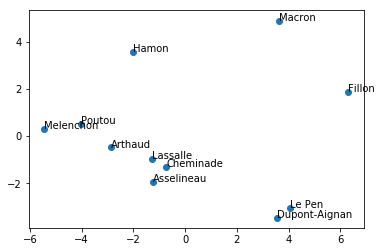

In [4]:
plt.scatter(X_proj[:, 0], X_proj[:, 1])
for name, x, y in zip(csv.columns[1:], X_proj[:, 0], X_proj[:, 1]):
    plt.annotate(name, (x, y))
plt.show()

## Interprétation

Il est intéressant de noter que sans aucune autre information on a bien 2 axes qui se dessinent. L'interprétation de ces axes est effectuée _a posteriori_: à l'inverse de la carto qui est réalisée de manière aveugle par l'outil ACP, l'interprétation que je fais ensuite peut être critiquée car est subjective.

Voici les deux axes que j'interprète.

### Axe social/libéral

L'axe des x semble suivre un axe social/libéral.
Tout à gauche on retrouve Mélenchon et tout à droite Fillon. Entre les deux:
 - un groupement de gauche Mélenchon Poutou Arthaud Hamon (mais comme décrit plus haut Poutou et Arthaud sont artificiellement poussés vers le centre avec ces méthodes).
 - Puis vient Hamon, puis un groupe Lassalle Asselineau Cheminade
 - Viennent ensuite Macron, Le Pen et Dupont-Aignan, puis en dernier Fillon.
 
Il est à noter que suivant cet axe les candidats Macron et Le Pen sont juste à côté, et également à proximité de Fillon, et à l'exact opposé des candidats "de gauche" Mélenchon, Poutou et Arthaud et dans une moindre mesure Hamon.

### Axe souverainisme/mondialisation

L'axe des y semble suivre un axe souverainisme/mondialisation.
Tout en bas on retrouve Dupont-Aignan, et tout en haut Macron. Entre les deux:
 - Dupont-Aignan et Le Pen sont très proches, dans la partie la plus souverainiste.
 - puis viennent Asselineau, Cheminade et Lassalle
 - ensuite Arthaud, Mélenchon et Poutou
 - puis on retrouve Fillon, Hamon et Macron, mais moins groupés que les précédents.
 
A noter cette fois ci la proximité au centre entre Fillon et Mélenchon, et cette fois ci Macron et Le Pen sont à l'opposé.

In [5]:
std_components = pca.components_ / X_raw.std(axis=0)
df_components = pandas.DataFrame(data={
    'Themes': csv.values[:, 0],
    'c1': std_components[0, :],
    'c2': std_components[1, :],
    'c1_mag': np.abs(std_components[0, :]),
    'c2_mag': np.abs(std_components[1, :]),
})
print 'First component:'
print df_components.sort_values(by=['c1_mag'], ascending=False)[['Themes', 'c1']]
print 'Second component:'
print df_components.sort_values(by=['c2_mag'], ascending=False)[['Themes', 'c2']]

First component:
                             Themes        c1
25                    Durée travail  0.259973
6                    Augmenter SMIC -0.253846
36            Regroupement familial -0.246940
40                     Sécu sociale -0.238174
76  Droit de vote étrangers locales -0.237967
73                         Art 49.3  0.224932
13                             CICE  0.224739
41                 Déserts médicaux -0.223012
35         Contrôle frontières euro  0.222002
21                    Licenciements  0.219047
55         Déchéance de nationalité  0.215654
4                    Minima sociaux -0.215439
45                         Cannabis -0.212647
62                        Nucléaire  0.211357
0                    Fonctionnaires -0.209387
28               Dépenses publiques -0.208528
33             Quotas d’immigration  0.208413
16             Cotisations sociales -0.205899
34                    Droit d’asile -0.203723
42                       Fin de vie -0.201715
65             Fi

/home/tfjgeorge/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':
